In [5]:
#getting and working with data
import pandas as pd
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler, Normalizer
import numpy as np
from sklearn.metrics.cluster import silhouette_score
from IPython.display import Image


#visualizing results
%matplotlib inline
import seaborn as sns

In [6]:
iris_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data',names=["sepal_length","sepal_width","petal_length","petal_width","iris_type"])

In [7]:
iris_data_no_names=iris_data[iris_data.columns[:-1]]
iris_data_no_names.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris_data_features=iris_data_no_names.columns

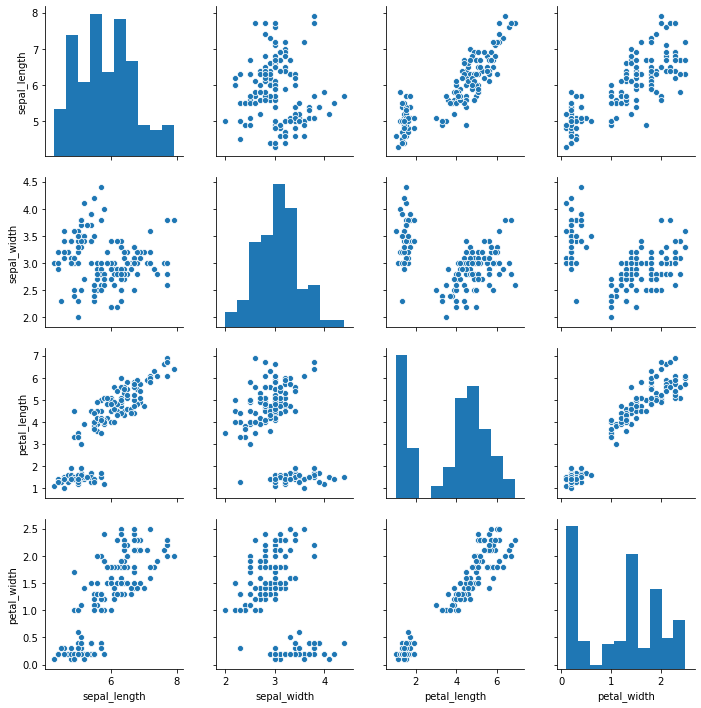

In [9]:
## Pairplot with relationship b/w each variable
sns.pairplot(iris_data_no_names)

In [10]:
## Looks like there are 2 basic clusters , so we can apply K- means clustering algorthm with 2 clusters
kmeans=KMeans(n_clusters=2,random_state=1)

In [11]:
kmeans.fit(iris_data_no_names)   ## Fitting the dataframe without the type column to the clustering algorithm

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [12]:
kmeans.labels_[:60]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [13]:
iris_data_no_names["kmeans_cluster"]=kmeans.labels_

In [14]:
iris_data_no_names.head(5)

,sepal_length,sepal_width,petal_length,petal_width,kmeans_cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


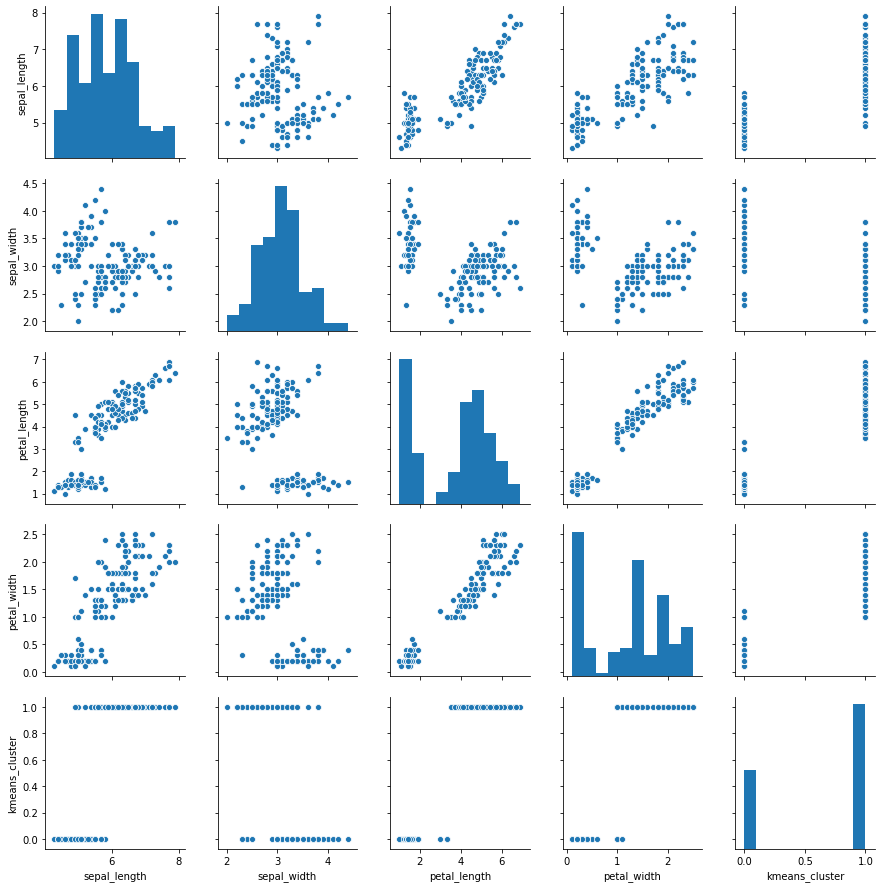

In [15]:
## sns.pairplot(iris_data_no_names, hue= "kmeans_cluster")
sns.pairplot(iris_data_no_names)

Represents the center mean values for every attribute for each cluster 
[5.00566038, 3.36981132, 1.56037736, 0.29056604] ##
[mean_sepal_length,mean_sepal_width,mean_petal_length,mean_petal_width  for cluster = 0]

[6.30103093, 2.88659794, 4.95876289, 1.69587629] ##
[mean_sepal_length,mean_sepal_width,mean_petal_length,mean_petal_width  for cluster = 1]

In [16]:
kmeans.cluster_centers_

array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

In [17]:
## To understand how the cluster centers are computed, group by the clusters and see the avergae

iris_cluster_centers = iris_data_no_names.groupby('kmeans_cluster')
iris_cluster_centers

##Calculating the mean
iris_cluster_centers.mean()

,sepal_length,sepal_width,petal_length,petal_width
kmeans_cluster,,,,
0,5.005660,3.369811,1.560377,0.290566
1,6.301031,2.886598,4.958763,1.695876


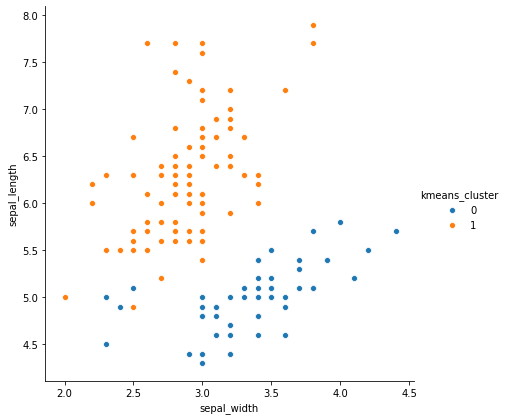

In [18]:
sns.pairplot(iris_data_no_names,x_vars="sepal_width",y_vars="sepal_length",hue="kmeans_cluster",height=6)
#sns.mpl.pyplot.scatter(iris_cluster_centers.sepal_width,iris_cluster_centers.sepal_length,linewidth=3,marker='x',s=200,c='black')

In [19]:
### Scaling the data in terms of Z-score
## Z- score is the value calculated for every column so  that comparison can be done at a common scal across the columns in the dataset
## Z- score - (value of column - mean of column ) / standar deviation of of column

scaler = StandardScaler()
iris_data_scaled = scaler.fit_transform(iris_data_no_names[iris_data_features])
iris_data_scaled = pd.DataFrame(iris_data_scaled,columns=iris_data_features)
print("Before scaling:\n", iris_data_no_names[iris_data_features].describe())
print("\nAfter scaling:\n", np.round(iris_data_scaled.describe(),2))

Before scaling:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

After scaling:
        sepal_length  sepal_width  petal_length  petal_width
count        150.00       150.00        150.00       150.00
mean          -0.00        -0.00         -0.00        -0.00
std            1.00         1.00          1.00         1.00
min           -1.87        -2.43         -1.57        -1.45
25%           -0.90        -0.59         -1.23        -1.18
50%           -0.05        -0.13          0.34         0.13
75%   

In [20]:
## Performing clustering algorithm on the scaled data and checking the centers

km = KMeans(n_clusters=2,random_state=1)
km.fit(iris_data_scaled)
iris_data_no_names['kmeans_scaled'] = [ "cluster_" + str(label) for label in km.labels_ ]
print(km.cluster_centers_)                                  ## Gives results on scaled data
iris_data_no_names.groupby('kmeans_scaled').mean()          ## Gives result in unscaled data

[[-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 0.50728948 -0.42663134  0.65249366  0.62744675]]


,sepal_length,sepal_width,petal_length,petal_width,kmeans_cluster
kmeans_scaled,,,,,
cluster_0,5.006,3.428,1.462,0.246,0.00
cluster_1,6.262,2.872,4.906,1.676,0.97


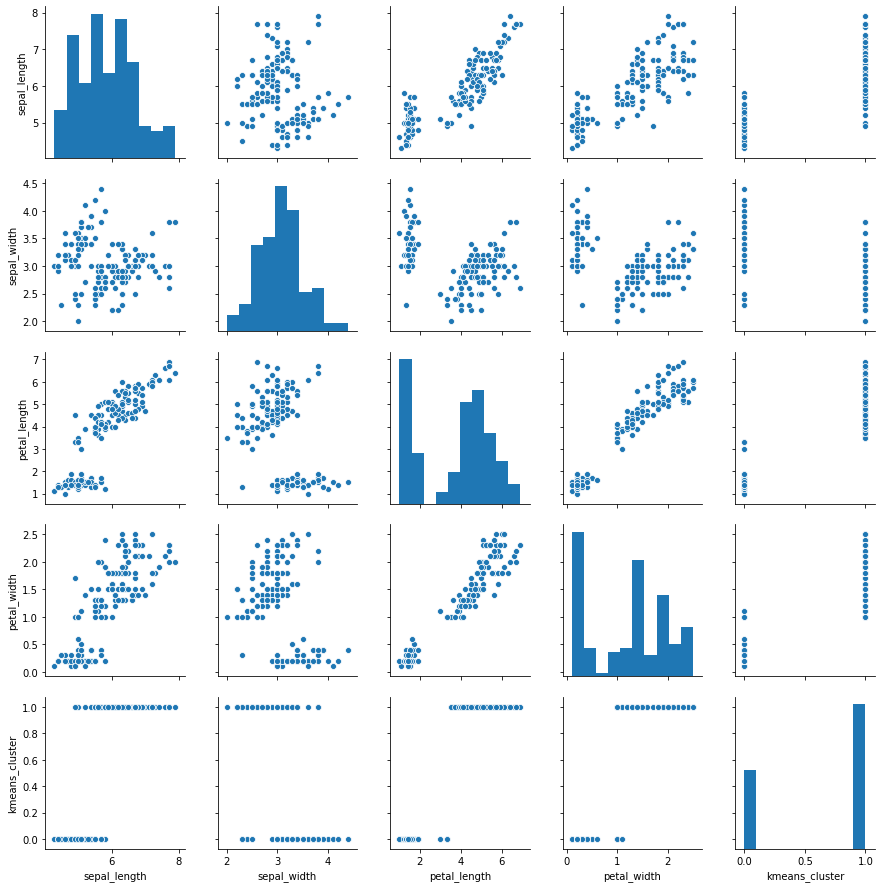

In [23]:
sns.pairplot(iris_data_no_names)

In [28]:
### KMeans/ Scaling with 4 clusters

kmeans3=KMeans(n_clusters=3,random_state=1)
kmeans3.fit(iris_data_no_names[iris_data_features])
#iris_data_no_names.columns

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [29]:
kmeans3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [33]:
iris_data_no_names["k_means_cluster_3"]= [str(label) for label in kmeans3.labels_]

In [35]:
print(kmeans3.cluster_centers_)                                  ## Gives results on scaled data
iris_data_no_names.groupby('k_means_cluster_3').mean()    

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


,sepal_length,sepal_width,petal_length,petal_width,kmeans_cluster
k_means_cluster_3,,,,,
0,5.901613,2.748387,4.393548,1.433871,0.951613
1,5.006000,3.428000,1.462000,0.246000,0.000000
2,6.850000,3.073684,5.742105,2.071053,1.000000


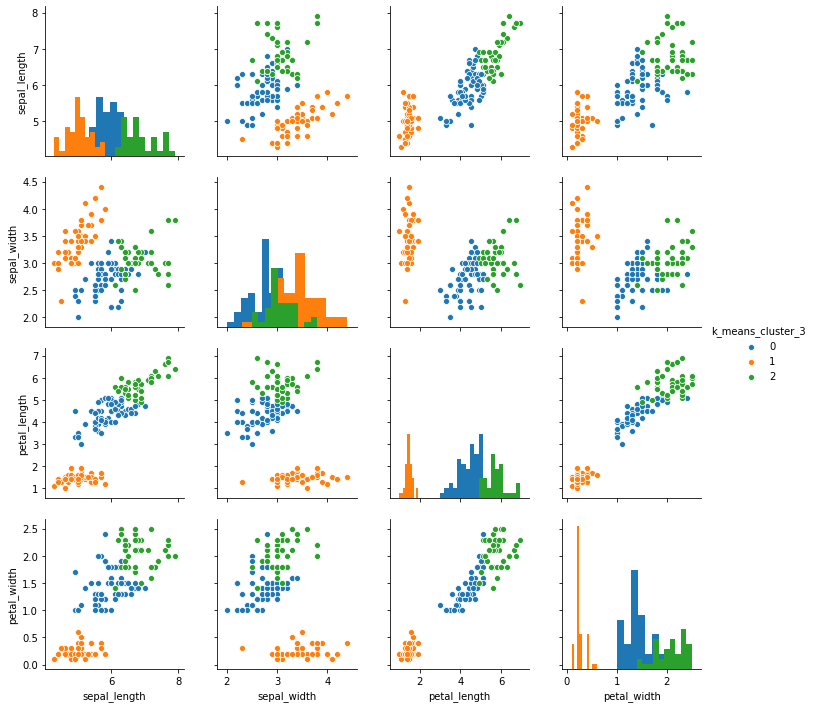

In [77]:
sns.pairplot(iris_data_no_names,hue='k_means_cluster_3',vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],diag_kind='hist')

In [39]:
print("Silluote score when k=2",silhouette_score(iris_data_scaled,km.labels_))

Silluote score when k=2 0.5817500491982808


In [40]:
print("Silluote score when k=2",silhouette_score(iris_data_scaled,kmeans.labels_))

Silluote score when k=2 0.5667290956831196


In [42]:
#### Exercise using Seeds Dataset

In [43]:
seed_data = pd.read_csv("C:/Users/Madhumita.Ganesan/Desktop/DataScience/data/seeds_dataset.txt",names = ["area","perimter","compactness","length","width","asymmetry","kernel_groove_length","seed_type"])

In [44]:
seed_data.drop("seed_type",axis=1,inplace=True)
seed_data.head()

,area,perimter,compactness,length,width,asymmetry,kernel_groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


Text(0, 0.5, 'Silhoutte score')

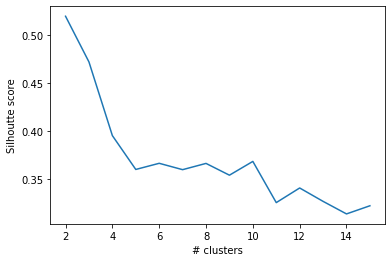

In [52]:
## Getting the silhoutte scores for various clusters

silhoutte_scores = []
for cluster in range(2,16):
    km_seed = KMeans(n_clusters=cluster).fit(seed_data)
    silhoutte_scores.append(silhouette_score(seed_data,km_seed.labels_))
    
sns.mpl.pyplot.plot(range(2,16),silhoutte_scores)
sns.mpl.pyplot.xlabel("# clusters")
sns.mpl.pyplot.ylabel("Silhoutte score")




In [55]:
## DB Scan Algorithm to build unsupervised learning model

db = DBSCAN(eps=1,min_samples=3)
db.fit(iris_data_scaled)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [60]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int32)

In [61]:
iris_data_no_names['dbscan_eps1_mpts3']= ["cluster"+str(label) for label in db.labels_]

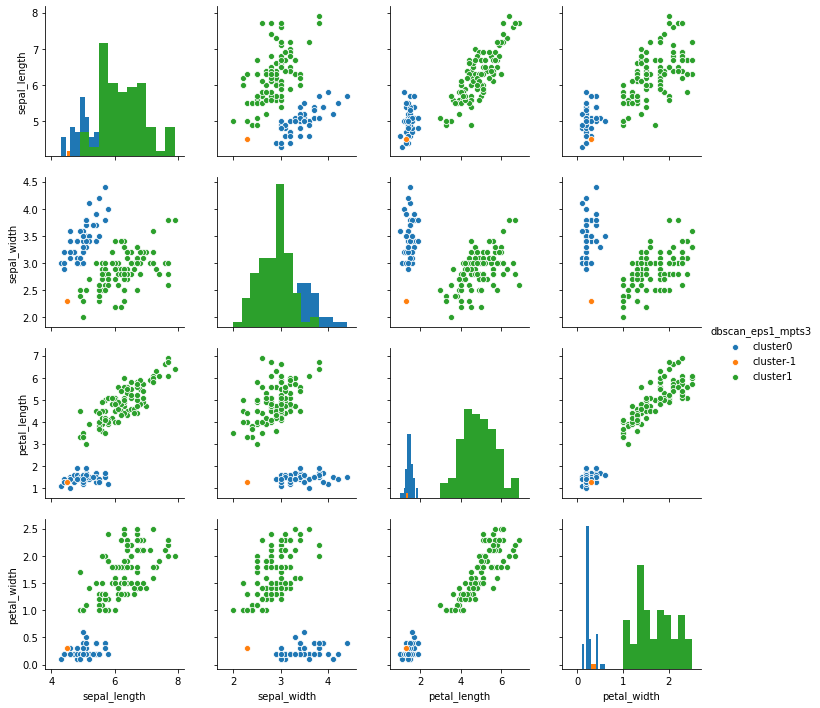

In [71]:
sns.pairplot(iris_data_no_names,hue='dbscan_eps1_mpts3',vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],diag_kind='hist')
#iris_data_no_names.columns

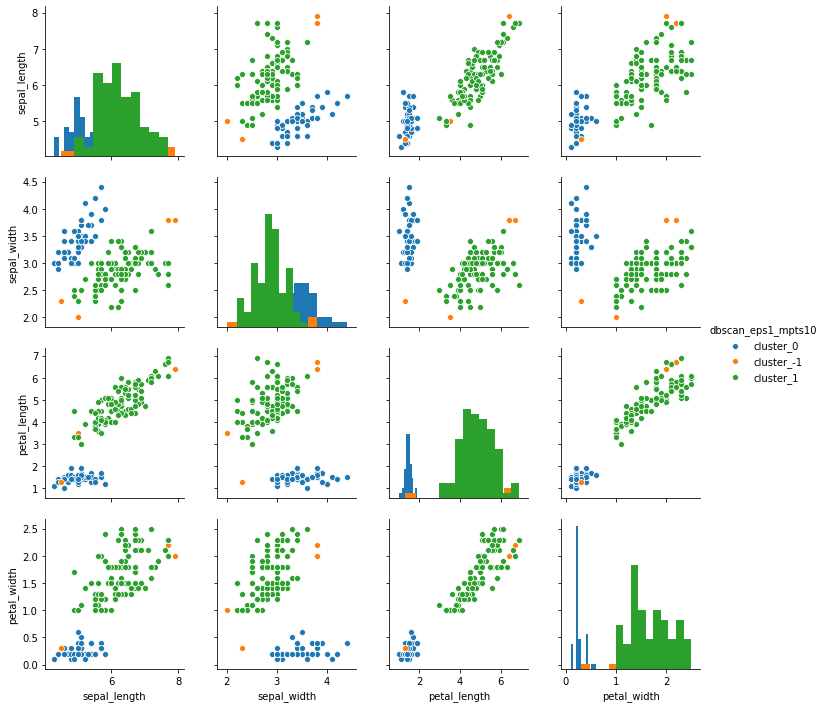

In [72]:
## Increasing te number of samples

db2=DBSCAN(eps=1,min_samples=10)
db2.fit(iris_data_scaled)
iris_data_no_names['dbscan_eps1_mpts10']=["cluster_"+str(label) for label in db2.labels_]
sns.pairplot(iris_data_no_names,hue='dbscan_eps1_mpts10',vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],diag_kind='hist')

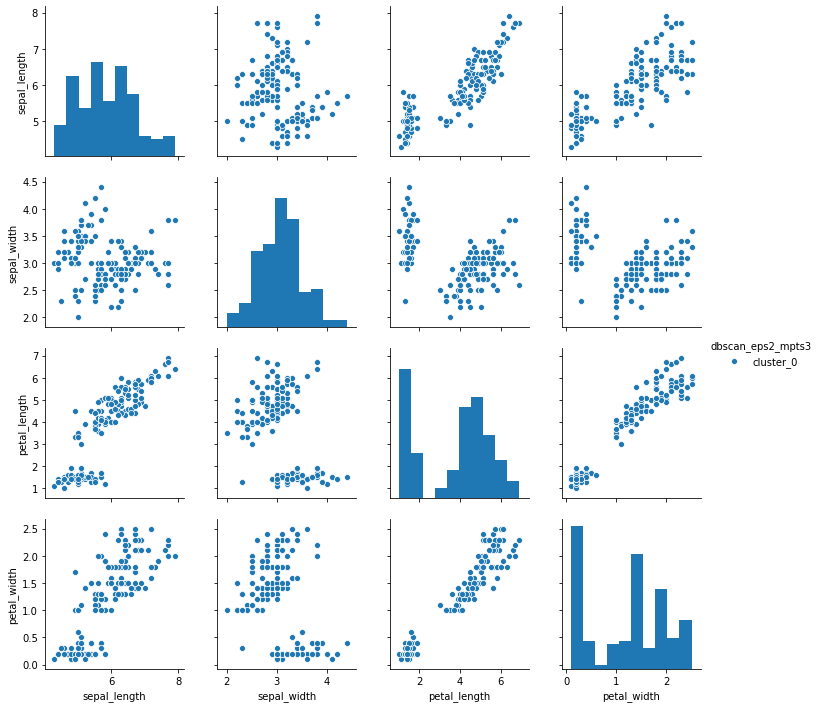

In [141]:
## Increasing the epsilon

db3=DBSCAN(eps=2,min_samples=3)
db3.fit(iris_data_scaled)
iris_data_no_names['dbscan_eps2_mpts3']=["cluster_"+ str(label) for label in db3.labels_]
sns.pairplot(iris_data_no_names,hue='dbscan_eps2_mpts3',vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],diag_kind='hist')

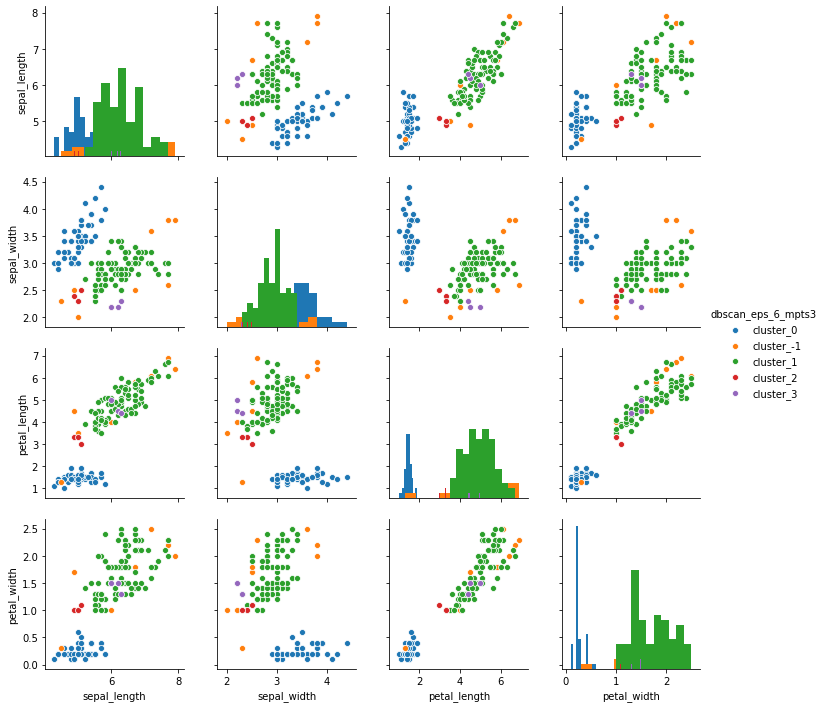

In [76]:
db4=DBSCAN(eps=0.6,min_samples=3)
db4.fit(iris_data_scaled)
iris_data_no_names['dbscan_eps_6_mpts3']=["cluster_"+ str(label) for label in db4.labels_]
sns.pairplot(iris_data_no_names,hue='dbscan_eps_6_mpts3',vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],diag_kind='hist')

In [78]:
iris_data_no_names.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'kmeans_cluster', 'kmeans_scaled', 'k_means_cluster_3',
       'dbscan_eps1_mpts3', 'dbscan_eps1_mpts10', 'dbscan_eps2_mpts3',
       'dbscan_eps_6_mpts3'],
      dtype='object')

In [146]:
columns=['dbscan_eps1_mpts3', 'dbscan_eps1_mpts10', 'dbscan_eps2_mpts3','dbscan_eps_6_mpts3']
silhouette_score_list=[]
#for col in columns:
    #print(iris_data_no_names[col].values[0:])
#    col1= repr(col)
#    print(col1)
#    silhouette_score_list.append(silhouette_score(iris_data_scaled,iris_data_no_names[col].values[0:]))
silhouette_score_list.append(silhouette_score(iris_data_scaled,iris_data_no_names['dbscan_eps1_mpts3'].values[0:]))
silhouette_score_list.append(silhouette_score(iris_data_scaled,iris_data_no_names['dbscan_eps1_mpts10'].values[0:]))
#silhouette_score_list.append(silhouette_score(iris_data_scaled,iris_data_no_names['dbscan_eps2_mpts3'].values[0:]))
silhouette_score_list.append(silhouette_score(iris_data_scaled,iris_data_no_names['dbscan_eps_6_mpts3'].values[0:]))

In [148]:
silhouette_score_list

[0.504645610832545, 0.5390161166886172, 0.2951624178432283]